In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [50]:
titanic = pd.read_csv('/home/xyk/data/Downloads/PTA/titanic.csv')

In [51]:
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
titanic.shape[0]

891

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
titanic.shape

(891, 12)

In [55]:
titanic.index

RangeIndex(start=0, stop=891, step=1)

In [56]:
t = titanic.groupby('Name')
t = t.sum()
t = t.sort_values(['Pclass'], ascending=False)
t

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Name,,,,,,,
"Abbing, Mr. Anthony",846,0,3,42.0,0,0,7.550
"Moor, Master. Meier",752,1,3,6.0,0,1,12.475
"McCormack, Mr. Thomas Joseph",829,1,3,0.0,0,0,7.750
"McCoy, Miss. Agnes",331,1,3,0.0,2,0,23.250
"McCoy, Mr. Bernard",302,1,3,0.0,2,0,23.250
...,...,...,...,...,...,...,...
"Silvey, Mr. William Baird",435,0,1,50.0,1,0,55.900
"Silvey, Mrs. William Baird (Alice Munger)",578,1,1,39.0,1,0,55.900
"Behr, Mr. Karl Howell",890,1,1,26.0,0,0,30.000


In [57]:
total_items_orders = titanic.Fare.sum()
total_items_orders


28693.9493

In [58]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [59]:
titanic.drop(columns='PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


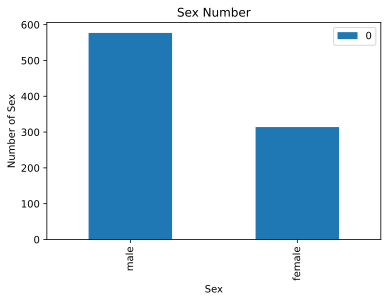

In [60]:
x = titanic.Sex
letter_counts = Counter(x)
df = pd.DataFrame.from_dict(letter_counts, orient='index')
df.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Number of Sex')
plt.title('Sex Number')
plt.show()

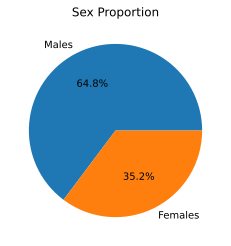

In [61]:
males = (titanic['Sex'] == 'male').sum()
females = (titanic['Sex'] == 'female').sum()
proportions = [males, females]
plt.pie(proportions,labels = ['Males', 'Females'],autopct = '%1.1f%%')
plt.title("Sex Proportion")
plt.show()

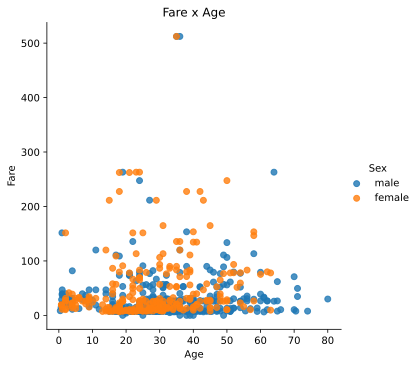

In [62]:
lm = sns.lmplot(x = 'Age', y = 'Fare', data = titanic, hue = 'Sex', fit_reg=False)
lm.set(title = 'Fare x Age')
axes = lm.axes

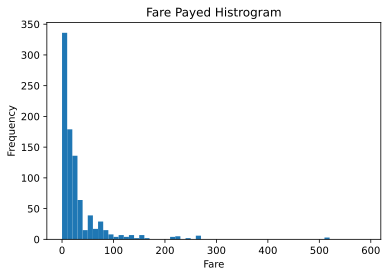

In [63]:
df = titanic.Fare.sort_values(ascending = False)
binsVal = np.arange(0,600,10)
plt.hist(df, bins = binsVal)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Fare Payed Histrogram')
plt.show()

,Survived,Pclass,Age,Sex,Fare,SibSp,Parch
Survived,1.000000,-0.338481,-0.077221,-0.543351,0.257307,-0.035322,0.081629
Pclass,-0.338481,1.000000,-0.369226,0.131900,-0.549500,0.083081,0.018443
Age,-0.077221,-0.369226,1.000000,0.093254,0.096067,-0.308247,-0.189119
Sex,-0.543351,0.131900,0.093254,1.000000,-0.182333,-0.114631,-0.245489
Fare,0.257307,-0.549500,0.096067,-0.182333,1.000000,0.159651,0.216225
SibSp,-0.035322,0.083081,-0.308247,-0.114631,0.159651,1.000000,0.414838
Parch,0.081629,0.018443,-0.189119,-0.245489,0.216225,0.414838,1.000000


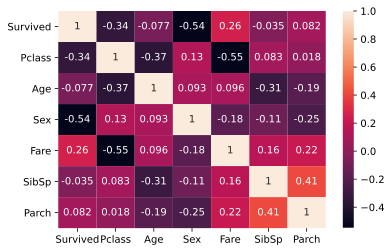

In [64]:
df = pd.DataFrame(data=titanic)
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df = df[['Survived','Pclass','Age','Sex','Fare','SibSp', 'Parch']].corr()
sns.heatmap(df,annot=True)
df